In [1]:
%matplotlib widget

In [2]:
from crank_nicolson_2d import *

In [3]:
import numpy as np

In [4]:
def tunnelCase(position, where, width, potential = 1): 
    return np.where(
            (position.x > where) & (position.x < (where + width)), 
            potential, 
            0, 
        )

In [5]:
def hydrogenAtom(position, potential, bottom = 1): 
    return potential / np.sqrt(
            (position.x / 2) ** 2 \
            + (position.y / 2) ** 2 \
            + bottom ** 2 \
        )

In [7]:
pointCount : int = 50
spatialStep : float = .01
temporalStep : float = (spatialStep ** 2) / 4
profile = SimulationProfile(
        makeLinspaceGrid(pointCount, 1, 2), 
        lambda position : makeWavePacket(position, .45, 0.5, .05), 
        lambda position, time : 0 * position.x, 
        .01, 
        .01
    )
simulator = Simulator(profile)
simulator.simulate(100)
probabilities, probabilityDecibles = simulator.processProbabilities()

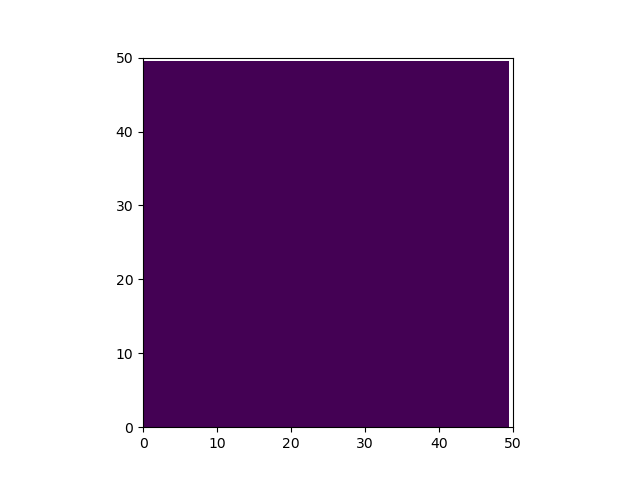

In [8]:
potentialAnimation = animateImages(pointCount, simulator.potentials)

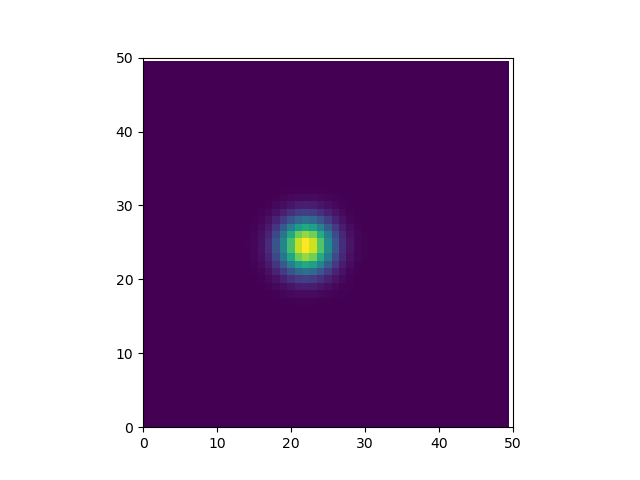

In [9]:
waveAnimation = animateImages(pointCount, simulator.probabilities)

In [10]:
waveAnimation.save("zero_potential_dense_0.mp4")